# Задание 1
## Тема: Нечеткие модели знаний

### Настройка окружения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

### Описание задачи
Дано 3 нечетких множества $A$, $B$, $C$ (заданы их функции принадлежности). Построить функцию принадлежности нечеткого множества $D = \overline{A} \cap (C \cup B) \cap \overline{C}$ и определить степень принадлежности одного элемента множеству $D$, используя максиминный метод

In [2]:
x = np.arange(0, 15, 0.1)

A = fuzz.trimf(x, [2, 8, 13]) * 0.5

B = np.interp(x, [2, 8, 9, 14], [0, 0.5, 0.25, 0])

C = fuzz.trapmf(x, [4, 5, 7, 8])

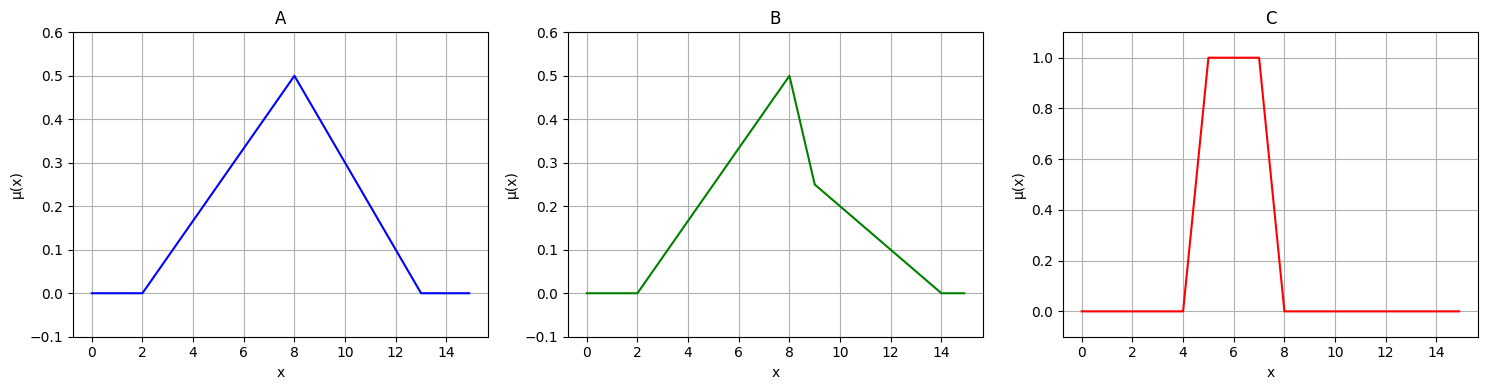

In [3]:
plt.figure(figsize=(15, 4))

for i, (mu, color, label, ylim) in enumerate(
    zip([A, B, C], ["b", "g", "r"], ["A", "B", "C"], [0.6, 0.6, 1.1]), 1
):
    plt.subplot(1, 3, i)
    plt.plot(x, mu, color)
    plt.title(label)
    plt.xlabel("x")
    plt.ylabel("μ(x)")
    plt.ylim(-0.1, ylim)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Решение

Для построения функции принадлежности нового множества необходимо:

1. Определить последовательность выполнения операций в формуле.

Множество $D = \overline{A} \cap (C \cup B) \cap \overline{C}$ значит, последовательность операций будет следующей:

1. $\overline{A}$;
2. $\overline{C}$;
3. $C \cup B$;
4. $\overline{A} \cap (C \cup B)$;
5. $\overline{A} \cap (C \cup B) \cap \overline{C}$.

2. Построить на отдельных графиках промежуточные множества, согласно определенной последовательности действий. Свести промежуточные множества на одном графике и определить итоговую функцию принадлежности.

- Вычислим промежуточные результаты.

In [4]:
not_A = 1 - A
not_C = 1 - B

C_union_B = np.fmax(C, B)
not_A_inter_union = np.fmin(not_A, C_union_B)

- Визуализируем промежуточные результаты.

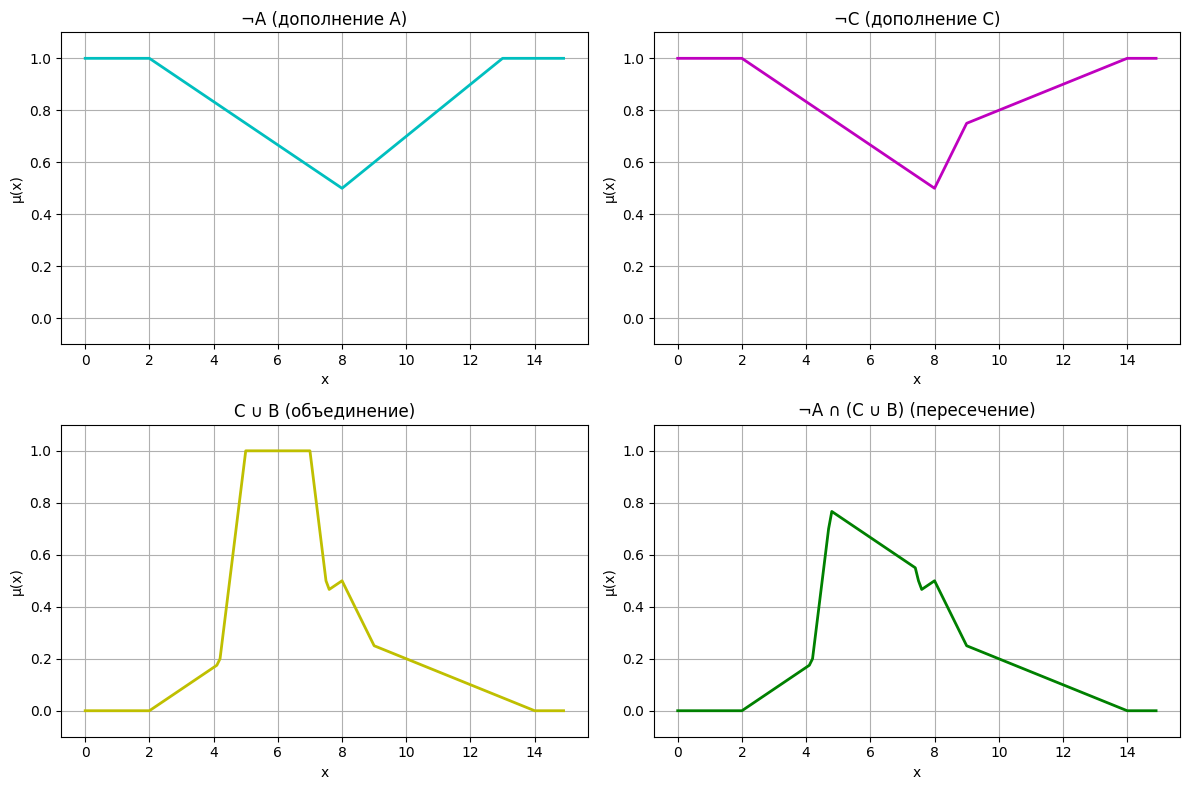

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

intermediate_titles = ["¬A (дополнение A)", "¬C (дополнение C)", 
                      "C ∪ B (объединение)", "¬A ∩ (C ∪ B) (пересечение)"]
intermediate_data = [not_A, not_C, C_union_B, not_A_inter_union]
colors = ["c", "m", "y", "g"]

for ax, title, data, color in zip(axes.flat, intermediate_titles, intermediate_data, colors):
    ax.plot(x, data, color, linewidth=2)
    ax.set_title(title)
    ax.set_ylim(-0.1, 1.1)
    ax.grid(True)
    ax.set_xlabel("x")
    ax.set_ylabel("μ(x)")

plt.tight_layout()
plt.show()

- Вычислим и визуализируем итоговый результат.

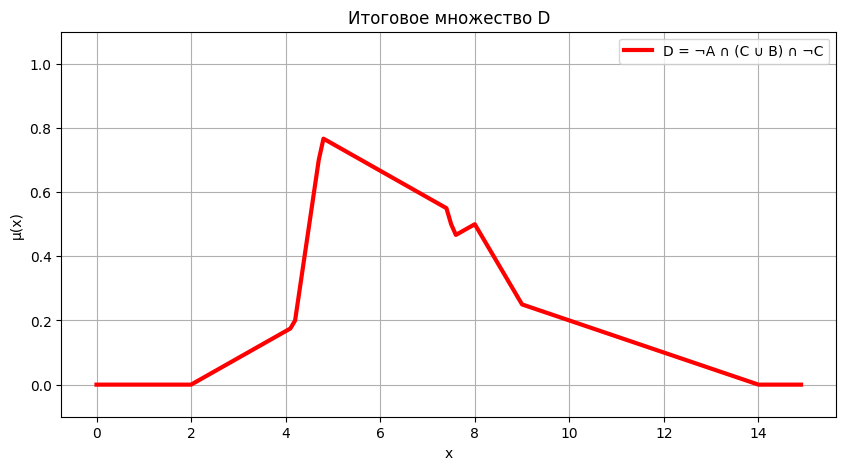

In [6]:
D = np.fmin(not_A_inter_union, not_C)

plt.figure(figsize=(10, 5))
plt.plot(x, D, "r", linewidth=3, label="D = ¬A ∩ (C ∪ B) ∩ ¬C")
plt.title("Итоговое множество D")
plt.xlabel("x")
plt.ylabel("μ(x)")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()

3. Для множества $D$ определим степень принадлежности элемента из его носителя, используя **максиминный метод**.

1. Исходные функции в точке $x = 8$:

$$
\mu_A(8) = 0.5 \\
\mu_B(8) = 0.5 \\
\mu_C(8) = 0
$$

2. Вычисление дополнений:

$$
\overline{\mu_A}(8) = 1 - \mu_A(8) = 0.5 \\
\overline{\mu_C}(8) = 1 - \mu_C(8) = 1.0
$$

3. Операция объединения $C \cup B$:

$$
(C \cup B)(8) = \max(\mu_C(8), \mu_B(8)) = \max(0, 0.5) = 0.5
$$

4. Применение максиминного метода:

$$
\mu_D(8) = \min\left(\overline{\mu_A}(8), (C \cup B)(8), \overline{\mu_C}(8)\right) = \min(0.5, 0.5, 1.0) = 0.5
$$

**Итоговый результат:**

Степень принадлежности элемента носителя множества $D$ в точке $x = 8$:

$$
\boxed{0.5}
$$

4. Проверить аналитические вычисления по построенному графику функции принадлежности.

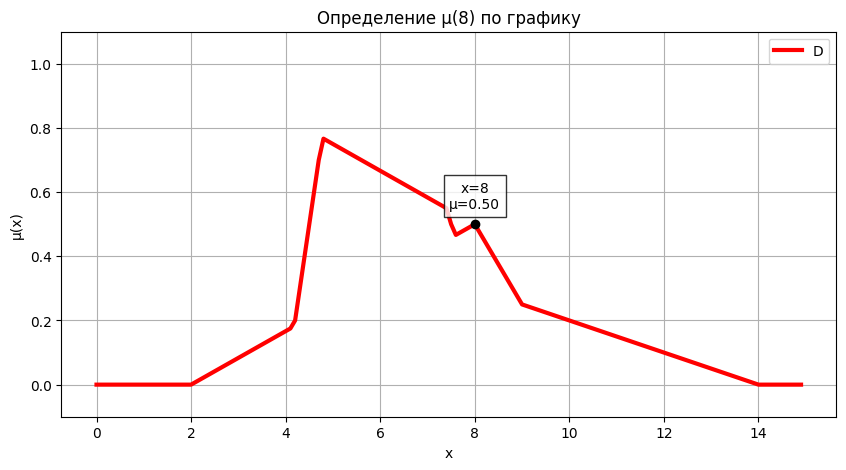

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(x, D, "r", linewidth=3, label="D")

x_point = 8
idx = np.abs(x - x_point).argmin()
y_point = D[idx]

plt.scatter(x_point, y_point, color="black", zorder=5)
plt.text(
    x_point,
    y_point + 0.05,
    f"x={x_point}\nμ={y_point:.2f}",
    ha="center",
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.8),
)

plt.title("Определение μ(8) по графику")
plt.xlabel("x")
plt.ylabel("μ(x)")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()

plt.show()